# Лабораторная работа №5
# Применение переноса обучения для решения задачи, поставленной во второй лабораторной работе
## Алексей Жариков

**Для построения и обучения сетей будем использовать библиотеку Keras**

In [0]:
import keras

Using TensorFlow backend.


**Для работы с матрицами будем использовать библиотеку numpy**

In [0]:
import numpy as np

**Для отрисовки различной информации будем использовать библиотеку matplotlib**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  

**Задачу переноса обучения  будем рассматривать на наборе данных  MNIST**

In [0]:
(X_pretrain, y_pretrain), (X_pretest, y_pretest) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
y_pretrain = keras.utils.to_categorical(y_pretrain, num_classes=10)
y_pretest = keras.utils.to_categorical(y_pretest, num_classes=10)

In [0]:
minValue = np.min(X_pretrain)
maxValue = np.max(X_pretrain)
X_pretrain = 2 * ((X_pretrain - minValue) / (maxValue - minValue) - 0.5)
X_pretest = 2 * ((X_pretest - minValue) / (maxValue - minValue) - 0.5)

**Задачу классификации изображений будем рассматривать на наборе данных Fashion MNIST**

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

**Данный набор состоит из изображений в градации серого различных типов одежды**

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Обучающее множество**

In [0]:
print("Количество изображений в обучающем множестве: {}".format(X_train.shape[0]))
print("Размер изображений: {} x {}".format(X_train.shape[1], X_train.shape[2]))
print("Классы объектов: {}".format(np.unique(y_train)))
for i in np.unique(y_train):
  print("Количество объектов класса {}: {}".format(i, sum(y_train == i)))

Количество изображений в обучающем множестве: 60000
Размер изображений: 28 x 28
Классы объектов: [0 1 2 3 4 5 6 7 8 9]
Количество объектов класса 0: 6000
Количество объектов класса 1: 6000
Количество объектов класса 2: 6000
Количество объектов класса 3: 6000
Количество объектов класса 4: 6000
Количество объектов класса 5: 6000
Количество объектов класса 6: 6000
Количество объектов класса 7: 6000
Количество объектов класса 8: 6000
Количество объектов класса 9: 6000


**Тестовое множество**

In [0]:
print("Количество изображений в тестовом множестве: {}".format(X_test.shape[0]))
for i in np.unique(y_test):
  print("Количество объектов класса {}: {}".format(i, sum(y_test == i)))

Количество изображений в тестовом множестве: 10000
Количество объектов класса 0: 1000
Количество объектов класса 1: 1000
Количество объектов класса 2: 1000
Количество объектов класса 3: 1000
Количество объектов класса 4: 1000
Количество объектов класса 5: 1000
Количество объектов класса 6: 1000
Количество объектов класса 7: 1000
Количество объектов класса 8: 1000
Количество объектов класса 9: 1000


**Пример изображений**

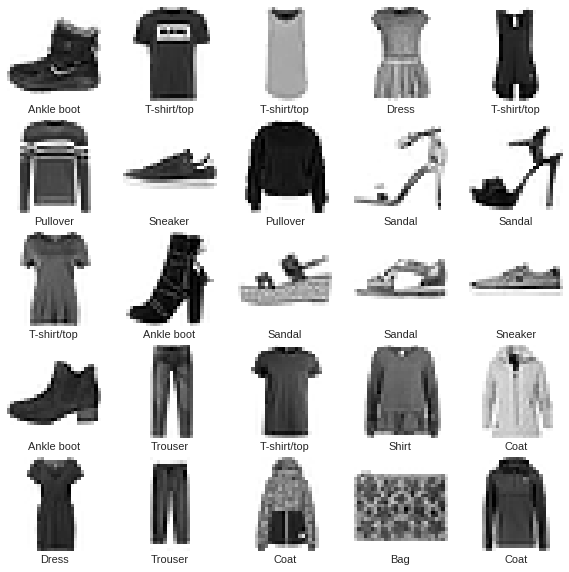

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

**Обучение полносвязных нейронных сетей**

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.optimizers import SGD

Воспользуемся one-hot для кодирования классов изображений

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

Нормализуем в ход в отрезок [-1, 1]

In [0]:
minValue = np.min(X_train)
maxValue = np.max(X_train)
X_train = 2 * ((X_train - minValue) / (maxValue - minValue) - 0.5)
X_test = 2 * ((X_test - minValue) / (maxValue - minValue) - 0.5)

**MLP 28x28->64->10**

In [0]:
Mnist_model = Sequential()

Mnist_model.add(Flatten(input_shape=(28, 28)))
Mnist_model.add(Dense(64, activation='relu'))
Mnist_model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
Mnist_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

prehistory = Mnist_model.fit(X_pretrain, y_pretrain,
                    validation_data=(X_pretest, y_pretest),
                    epochs=20,
                    batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.4177 - acc: 0.8750 - val_loss: 0.2829 - val_acc: 0.9200
Epoch 2/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2538 - acc: 0.9258 - val_loss: 0.2282 - val_acc: 0.9345
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2031 - acc: 0.9425 - val_loss: 0.1869 - val_acc: 0.9471
Epoch 4/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.1712 - acc: 0.9500 - val_loss: 0.1661 - val_acc: 0.9515
Epoch 5/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.1488 - acc: 0.9559 - val_loss: 0.1414 - val_acc: 0.9595
Epoch 6/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1317 - acc: 0.9617 - val_loss: 0.1317 - val_acc: 0.9610
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1207 - acc: 0.9647 - val_loss: 0.1263 - 

In [0]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

for l1,l2 in zip(model.layers[:1],Mnist_model.layers[0:1]):
  l1.set_weights(l2.get_weights())
    
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.5379 - acc: 0.8084 - val_loss: 0.4541 - val_acc: 0.8362
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4007 - acc: 0.8572 - val_loss: 0.4141 - val_acc: 0.8526
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.3692 - acc: 0.8674 - val_loss: 0.3924 - val_acc: 0.8588
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3474 - acc: 0.8765 - val_loss: 0.3830 - val_acc: 0.8636
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3303 - acc: 0.8821 - val_loss: 0.3736 - val_acc: 0.8642
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3188 - acc: 0.8858 - val_loss: 0.3761 - val_acc: 0.8663
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.3082 - acc: 0.8890 - val_loss: 0.3649 - val_acc

График точности на тренировочном и тестовом множествах

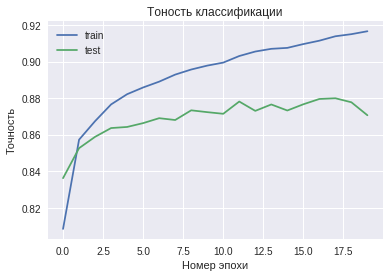

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**MLP 28x28->128->10**

In [0]:
Mnist_model = Sequential()

Mnist_model.add(Flatten(input_shape=(28, 28)))
Mnist_model.add(Dense(128, activation='relu'))
Mnist_model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
Mnist_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

prehistory = Mnist_model.fit(X_pretrain, y_pretrain,
                    validation_data=(X_pretest, y_pretest),
                    epochs=20,
                    batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3774 - acc: 0.8885 - val_loss: 0.2289 - val_acc: 0.9333
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2074 - acc: 0.9395 - val_loss: 0.1737 - val_acc: 0.9481
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1574 - acc: 0.9548 - val_loss: 0.1485 - val_acc: 0.9552
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1278 - acc: 0.9631 - val_loss: 0.1205 - val_acc: 0.9637
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1083 - acc: 0.9687 - val_loss: 0.1094 - val_acc: 0.9668
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0942 - acc: 0.9732 - val_loss: 0.1087 - val_acc: 0.9674
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0834 - acc: 0.9759 - val_loss: 0.0935 - val_acc

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.5266 - acc: 0.8123 - val_loss: 0.4615 - val_acc: 0.8319
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.3940 - acc: 0.8600 - val_loss: 0.4084 - val_acc: 0.8525
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.3588 - acc: 0.8727 - val_loss: 0.3931 - val_acc: 0.8604
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3358 - acc: 0.8793 - val_loss: 0.3894 - val_acc: 0.8537
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3180 - acc: 0.8863 - val_loss: 0.3677 - val_acc: 0.8690
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3044 - acc: 0.8915 - val_loss: 0.3559 - val_acc: 0.8719
Epoch 7/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2909 - acc: 0.8953 - val_loss: 0.3527 - val_acc

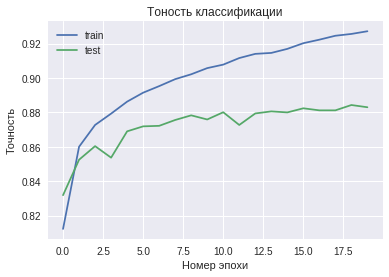

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

for l1,l2 in zip(model.layers[:1],Mnist_model.layers[0:1]):
  l1.set_weights(l2.get_weights())
    
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=128)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**MLP 28x28->128->128->64->32->10 без dropout**



In [0]:
Mnist_model = Sequential()

Mnist_model.add(Flatten(input_shape=(28, 28)))
Mnist_model.add(Dense(128, activation='relu'))
Mnist_model.add(Dense(128, activation='relu'))
Mnist_model.add(Dense(64, activation='relu'))
Mnist_model.add(Dense(32, activation='relu'))
Mnist_model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
Mnist_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

prehistory = Mnist_model.fit(X_pretrain, y_pretrain,
                    validation_data=(X_pretest, y_pretest),
                    epochs=20,
                    batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.4183 - acc: 0.8696 - val_loss: 0.1897 - val_acc: 0.9442
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1653 - acc: 0.9498 - val_loss: 0.1365 - val_acc: 0.9578
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1211 - acc: 0.9628 - val_loss: 0.1189 - val_acc: 0.9620
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0957 - acc: 0.9705 - val_loss: 0.0999 - val_acc: 0.9681
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0793 - acc: 0.9752 - val_loss: 0.1049 - val_acc: 0.9666
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0692 - acc: 0.9783 - val_loss: 0.0989 - val_acc: 0.9694
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0587 - acc: 0.9814 - val_loss: 0.0978 - val_acc

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 4s 69us/step - loss: 0.5798 - acc: 0.7927 - val_loss: 0.4528 - val_acc: 0.8399
Epoch 2/80
60000/60000 [==============================] - 4s 59us/step - loss: 0.3906 - acc: 0.8582 - val_loss: 0.4664 - val_acc: 0.8290
Epoch 3/80
60000/60000 [==============================] - 3s 58us/step - loss: 0.3508 - acc: 0.8720 - val_loss: 0.3885 - val_acc: 0.8583
Epoch 4/80
60000/60000 [==============================] - 4s 60us/step - loss: 0.3220 - acc: 0.8826 - val_loss: 0.3706 - val_acc: 0.8682
Epoch 5/80
60000/60000 [==============================] - 4s 61us/step - loss: 0.3054 - acc: 0.8880 - val_loss: 0.3742 - val_acc: 0.8658
Epoch 6/80
60000/60000 [==============================] - 4s 59us/step - loss: 0.2892 - acc: 0.8932 - val_loss: 0.3699 - val_acc: 0.8693
Epoch 7/80
60000/60000 [==============================] - 4s 59us/step - loss: 0.2766 - acc: 0.8987 - val_loss: 0.3617 - val_acc

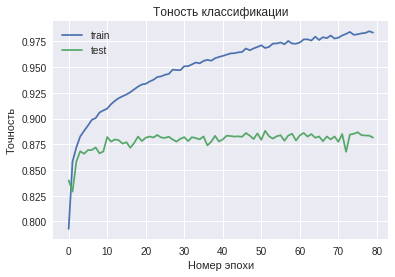

In [0]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

for l1,l2 in zip(model.layers[:4],Mnist_model.layers[0:4]):
  l1.set_weights(l2.get_weights())
    
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=80,
                    batch_size=128)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Точность полученной модели - 88,23%**

Можно сделать вывод о том, что какое-то улучшение есть и в целом точность улучшилась, хоть и незначительно

In [0]:
y_pred = model.predict(X_test)
print(y_pred)

[[1.70780111e-13 2.72143104e-18 2.13678356e-19 ... 2.06825163e-07
  1.26307854e-20 9.99999762e-01]
 [6.74726452e-09 2.86733738e-21 9.99557793e-01 ... 1.11227854e-16
  2.12511844e-20 3.22384455e-22]
 [6.87368081e-23 1.00000000e+00 1.38040044e-35 ... 5.10806763e-30
  3.01605338e-25 3.03025936e-34]
 ...
 [2.17374452e-11 3.18999225e-16 6.35952999e-19 ... 8.91432614e-16
  1.00000000e+00 7.53394292e-19]
 [8.55419401e-18 1.00000000e+00 5.47315483e-31 ... 3.56108058e-25
  4.65793716e-18 2.45020402e-23]
 [5.44463190e-14 4.94874019e-14 1.09632728e-13 ... 1.18494974e-08
  6.66102951e-16 5.87917056e-15]]


**Нарисуем матрицу расхождений**

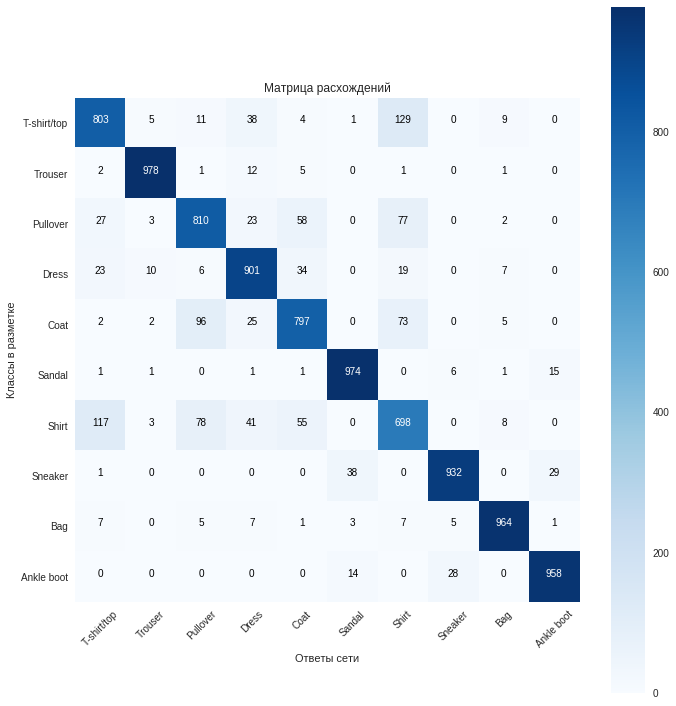

In [0]:
import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

plt.figure(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица расхождений")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], 'd'),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")
plt.grid(False)
plt.ylabel('Классы в разметке')
plt.xlabel('Ответы сети')
plt.tight_layout()
plt.show()

**Посмотрим на значения на последнем слое**

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

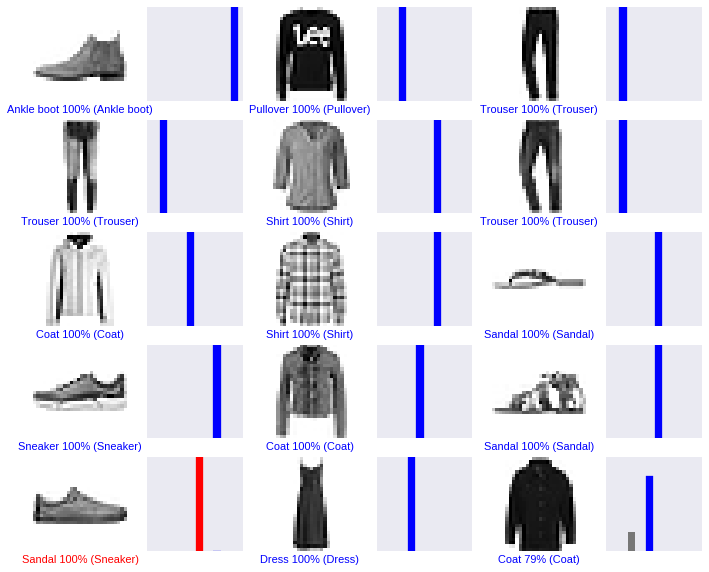

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, y_pred, np.argmax(y_test, axis=1), X_test)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, y_pred, np.argmax(y_test, axis=1))